# CNN for Analysis

In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [5]:
# Initializing the CNN
classifier = Sequential()

2024-04-22 16:29:46.899392: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Adding the Convolution Layer
classifier.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))


In [7]:
# Adding the Pooling Layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))


In [8]:
# Flattening the layer
classifier.add(Flatten())


In [9]:
# Adding the Fully Connected layer
classifier.add(Dense(units=128, activation='relu'))  # Hidden layer
classifier.add(Dense(units=1, activation='sigmoid'))  # Output layer


In [10]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [2]:
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

# Load the metadata CSV file and encode the labels
metadata_path = '../DATA/metadata.csv'
metadata = pd.read_csv(metadata_path)

# Make sure the 'isic_id' column contains the full filename with extension, e.g., 'ISIC_0000000.jpg'
# Assuming your image files are in .jpg format
metadata['isic_id'] = metadata['isic_id'].apply(lambda x: x + '.jpg')

# Encode the 'benign_malignant' labels to numerical values
le = LabelEncoder()
metadata['label'] = le.fit_transform(metadata['benign_malignant'])
# Convert the numerical labels to strings as required by flow_from_dataframe for binary classification
metadata['label'] = metadata['label'].astype(str)

# Define the paths for the training and testing sets
train_set_path = '../DATA/ISIC-images/Train'
test_set_path = '../DATA/ISIC-images/Test'

# Create the ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_dataframe to load images and labels based on the dataframe
training_set = train_datagen.flow_from_dataframe(
    dataframe=metadata,
    directory=train_set_path,
    x_col='isic_id',  # Column in dataframe that contains the filenames
    y_col='label',  # Column in dataframe that contains the labels
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary'  # Use 'binary' or 'categorical' based on the problem
)

test_set = test_datagen.flow_from_dataframe(
    dataframe=metadata,
    directory=test_set_path,
    x_col='isic_id',
    y_col='label',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary'
)




2024-04-22 16:29:10.857704: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 200 invalid image filename(s) in x_col="isic_id". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 800 invalid image filename(s) in x_col="isic_id". These filename(s) will be ignored.
  warnings.warn(


In [12]:
# Fit the model to the training set
classifier.fit_generator(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=test_set,
    validation_steps=len(test_set)
)

/var/folders/gy/sq_b71qx3931n7lpgb669l0w0000gq/T/ipykernel_25652/1762517321.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(


Epoch 1/10
25/25 [==============================] - 74s 3s/step - loss: 0.5651 - accuracy: 0.7788 - val_loss: 0.4915 - val_accuracy: 0.8750
Epoch 2/10
25/25 [==============================] - 69s 3s/step - loss: 0.5142 - accuracy: 0.7875 - val_loss: 0.3612 - val_accuracy: 0.8800
Epoch 3/10
25/25 [==============================] - 68s 3s/step - loss: 0.4903 - accuracy: 0.8000 - val_loss: 0.3830 - val_accuracy: 0.8800
Epoch 4/10
25/25 [==============================] - 77s 3s/step - loss: 0.4802 - accuracy: 0.8000 - val_loss: 0.3505 - val_accuracy: 0.8800
Epoch 5/10
25/25 [==============================] - 67s 3s/step - loss: 0.4905 - accuracy: 0.8000 - val_loss: 0.3509 - val_accuracy: 0.8800
Epoch 6/10
25/25 [==============================] - 71s 3s/step - loss: 0.4874 - accuracy: 0.7987 - val_loss: 0.3620 - val_accuracy: 0.8800
Epoch 7/10
25/25 [==============================] - 67s 3s/step - loss: 0.4742 - accuracy: 0.8062 - val_loss: 0.3548 - val_accuracy: 0.8800
Epoch 8/10
25/25 [==

In [18]:
# download the model
classifier.save('../OUTPUT/classifier_model.h5')

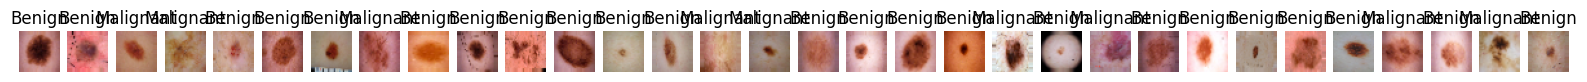

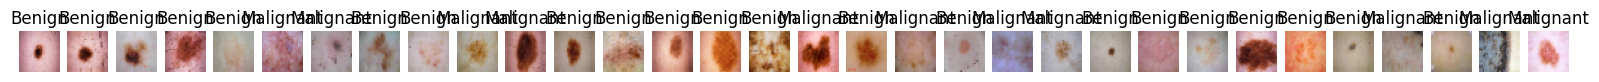

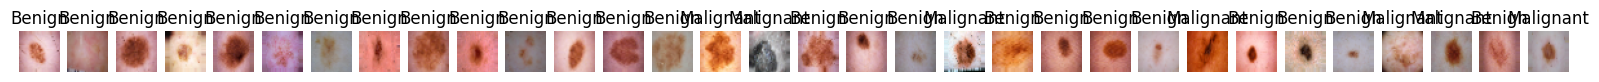

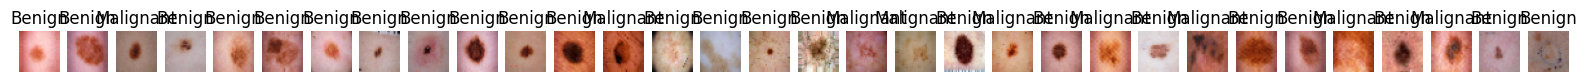

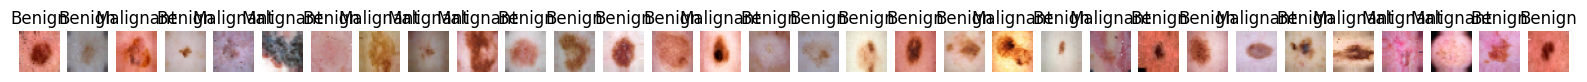

In [3]:
import matplotlib.pyplot as plt

def display_images_from_generator(gen, num_images=10):
    for i in range(num_images):
        # Get the next batch of images and labels
        images, labels = next(gen)
        
        fig, axs = plt.subplots(1, len(images), figsize=(20, 5))
        for j, (img, label) in enumerate(zip(images, labels)):
            axs[j].imshow(img)
            axs[j].title.set_text('Malignant' if label == 1 else 'Benign')
            axs[j].axis('off')
        plt.show()

# Display sample images and labels from the training set
display_images_from_generator(training_set, num_images=5)
